In [1]:
from queryClass.fetchSalesGraph_QueryHandling import FetchSalesGraphQueryHandling
from queryClass.browse_QueryHandling import BrowseQueryHandling

In [2]:
browse = BrowseQueryHandling()

""" 
We can filter our search to get more specific results, here we are searching for adidas-yeezy-boost-350 with special parameters. 

The search function takes in the following parameters:  

    - search: the search term
    - limit: the number of products to be returned
    - gender: men
    - years: the years of the products to be returned
    - sortID: the sorting method of the browse page (JSON\response\browseSort.json)
"""
browse.setSearch("adidas-yeezy-boost-350", 100 , gender = "men", years = ["2021","2022"], sortID = "featured")

""" get the main info from the browse query in panda dataframe """
df = browse.getInfo_DF()
df.to_csv('./INFO_BROWSE/adidas-yeezy-boost-350_100.csv')

print(df)

Browse query, status code : 403
 Wrong status code for Browse, might be a problem with the authorization variable in headers
Browse query, status code : 200


OSError: Cannot save file into a non-existent directory: 'INFO_BROWSE'

In [ ]:
idMaxSold = df['sold'].idxmax() #sold represent the number of total sales
row_with_highest_sold = df.loc[idMaxSold]
print(row_with_highest_sold['URL Key'] + 'has ' + str(row_with_highest_sold['sold']) + ' sales on stockX')


adidas-yeezy-boost-350-v2-onyxhas 25710 sales on stockX


In [ ]:
""" List the number of shoe sold for specific sizes """ 

checkVariantId = idMaxSold
total_sold = []
for key in ['9', '9.5', '10', '10.5']:
    browse.setSearch(df.iloc[idMaxSold]['URL Key'], 1, shoeSize= [key])
    browse.setResponse()
    total_sold.append(browse.getResponse()['data']['browse']['results']['edges'][0]['node']['market']['deadStock']['sold'])
    print("size " + str(key) + ", total sold : " + str(total_sold[-1]))

print("total sold for the 3 size : " + str(sum(total_sold)))



Browse query, status code : 200
size 9, total sold : 2176
Browse query, status code : 200
size 9.5, total sold : 2648
Browse query, status code : 200
size 10, total sold : 2925
Browse query, status code : 200
size 10.5, total sold : 2465
total sold for the 3 size : 10214


FetchSalesGraph query, status code : 200
FetchSalesGraph query, status code : 200
FetchSalesGraph query, status code : 200
FetchSalesGraph query, status code : 200
FetchSalesGraph query, status code : 200
Number of points fetched : 2175
FetchSalesGraph query, status code : 200
FetchSalesGraph query, status code : 200
FetchSalesGraph query, status code : 200
FetchSalesGraph query, status code : 200
FetchSalesGraph query, status code : 200
FetchSalesGraph query, status code : 200
Number of points fetched : 2646
FetchSalesGraph query, status code : 200
FetchSalesGraph query, status code : 200
FetchSalesGraph query, status code : 200
FetchSalesGraph query, status code : 200
FetchSalesGraph query, status code : 200
FetchSalesGraph query, status code : 200
Number of points fetched : 2928
FetchSalesGraph query, status code : 200
FetchSalesGraph query, status code : 200
FetchSalesGraph query, status code : 200
FetchSalesGraph query, status code : 200
FetchSalesGraph query, status code : 200
Nu

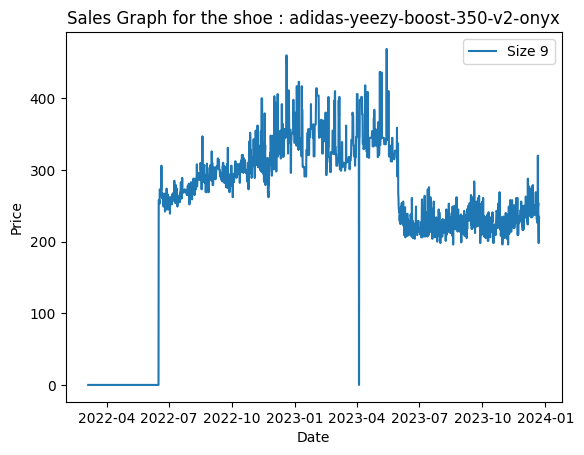

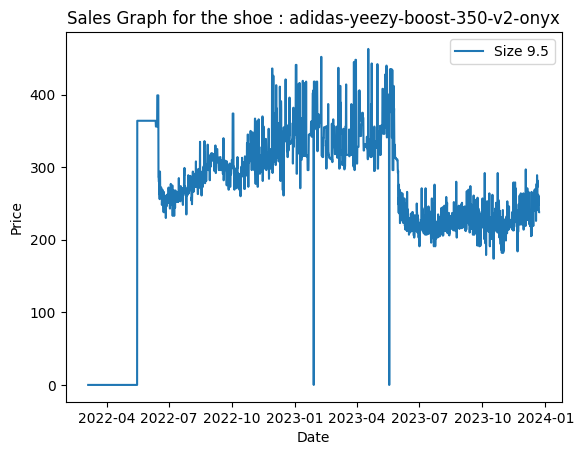

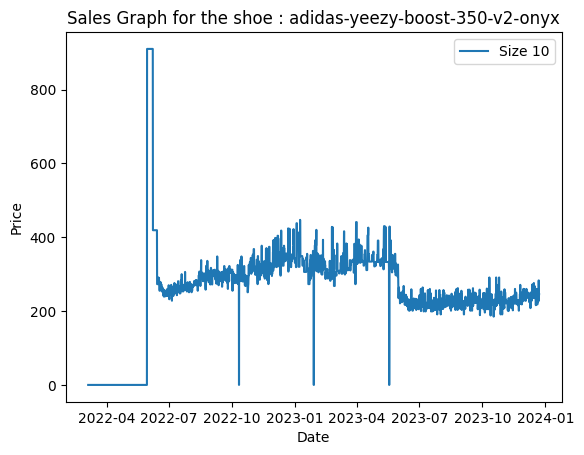

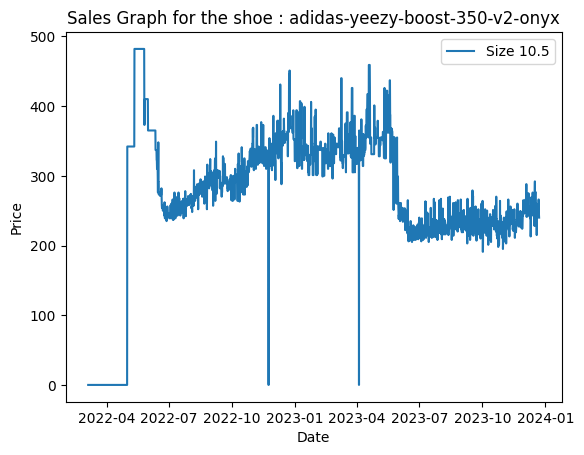

In [ ]:
import matplotlib.pyplot as plt
from numpy import size

sizes = ['9', '9.5', '10', '10.5']

for i in range(len(sizes)) :

    productId = df['Variants'][idMaxSold][sizes[i]]    
    sales = FetchSalesGraphQueryHandling(productId, isVariant = True)
    
    """ Number of sales to be returned and the release date"""
    intervals = total_sold[i]
    releaseDate = df.iloc[idMaxSold]["release Date"]

    """ get the data (time series) from the query as a panda dataframe"""
    data= sales.fetchSalesGraph(intervals, releaseDate ,currencyCode = "EUR")

    data.to_csv('./SALES/' + df.iloc[idMaxSold]['URL Key'] + '_size' + sizes[i] + '.csv')

    plt.figure()
    plt.plot(data.index, data['Price'], label=f"Size {sizes[i]}")

    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.title('Sales Graph for the shoe : ' + df.iloc[idMaxSold]['URL Key'])
    plt.legend()
plt.show()


FetchSalesGraph query, status code : 200
FetchSalesGraph query, status code : 200
FetchSalesGraph query, status code : 200
FetchSalesGraph query, status code : 200
FetchSalesGraph query, status code : 200
Number of points fetched : 2175
FetchSalesGraph query, status code : 200
FetchSalesGraph query, status code : 200
FetchSalesGraph query, status code : 200
FetchSalesGraph query, status code : 200
FetchSalesGraph query, status code : 200
FetchSalesGraph query, status code : 200
Number of points fetched : 2646
FetchSalesGraph query, status code : 200
FetchSalesGraph query, status code : 200
FetchSalesGraph query, status code : 200
FetchSalesGraph query, status code : 200
FetchSalesGraph query, status code : 200
FetchSalesGraph query, status code : 200
Number of points fetched : 2928
FetchSalesGraph query, status code : 200
FetchSalesGraph query, status code : 200
FetchSalesGraph query, status code : 200
FetchSalesGraph query, status code : 200
FetchSalesGraph query, status code : 200
Nu

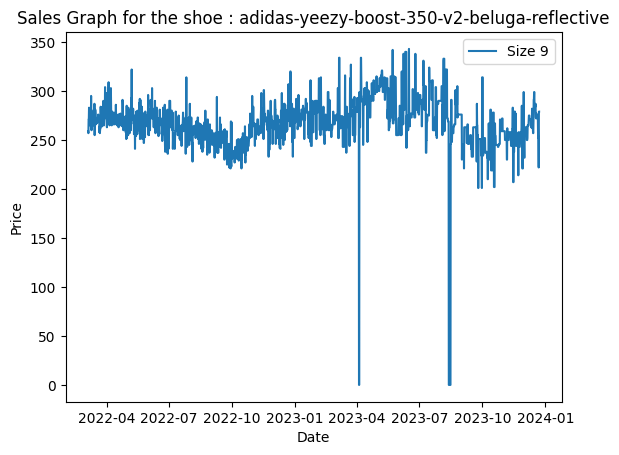

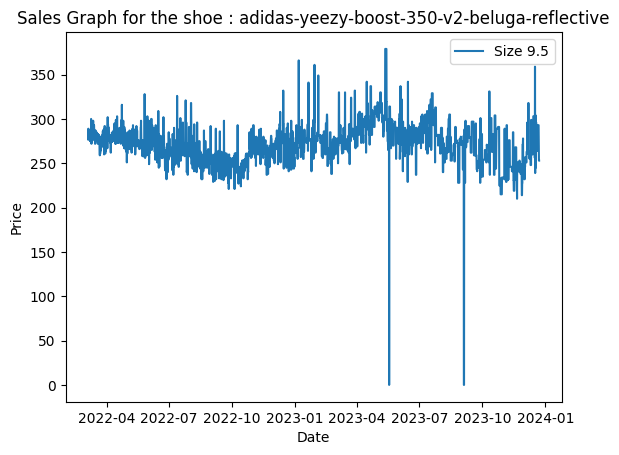

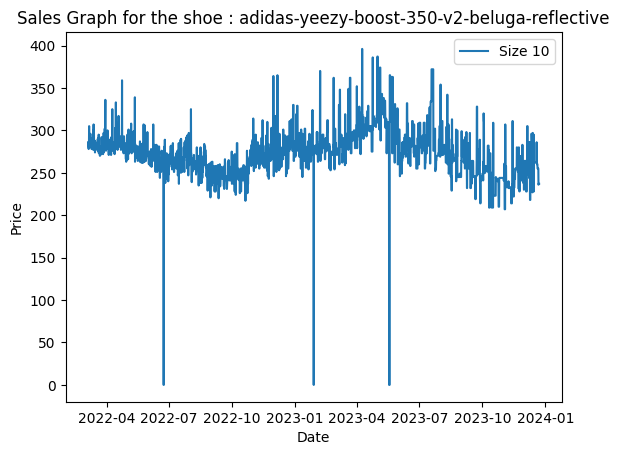

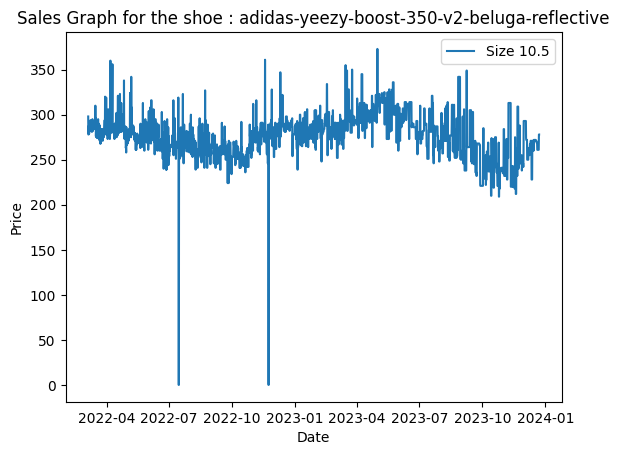

In [ ]:

""" Same process but for another shoe (id = 2) """

sizes = ['9', '9.5', '10', '10.5']

for i in range(len(sizes)) :

    productId = df['Variants'][2][sizes[i]]    
    sales = FetchSalesGraphQueryHandling(productId, isVariant = True)
    
    """ Number of sales to be returned and the release date"""
    intervals = total_sold[i]
    releaseDate = df.iloc[idMaxSold]["release Date"]

    """ get the data (time series) from the query as a panda dataframe"""
    data= sales.fetchSalesGraph(intervals, releaseDate ,currencyCode = "EUR")
    data.to_csv('./SALES/' + df.iloc[2]['URL Key'] + '_size' + sizes[i] + '.csv')


    plt.figure()
    plt.plot(data.index, data['Price'], label=f"Size {sizes[i]}")

    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.title('Sales Graph for the shoe : ' + df.iloc[2]['URL Key'])
    plt.legend()
plt.show()